<center><h1>Yifan_Zhang_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

Get the Vertebral Column Data Set

In [6]:
#%% load the data

attri = pd.read_csv('C:/USC/ds552/hw1/homework1/data/vertebral_column_data/column_2C.dat', delimiter = ' ', header = 0)
#'pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle',
#'sacral slope', 'pelvic radius', 'grade of spondylolisthesis'
attri.rename(columns = {'63.03':'pelvic incidence', '22.55':'pelvic tilt', '39.61':'lumbar lordosis angle','40.48':'sacral slope','98.67':'pelvic radius','-0.25':'grade of spondylolisthesis','AB':'Class'}, inplace = True)

for i in range(0,309):
    if attri.iloc[i,6] == 'AB':
        attri.iloc[i,6] ='1'
    else:
        attri.iloc[i,6] = '0'
# convert categories to binary


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

In [5]:
sns.pairplot(attri,diag_kind="hist", hue = 'Class' )

NameError: name 'attri' is not defined

#### ii. Boxplots

<AxesSubplot:>

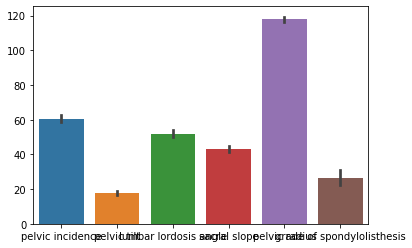

In [9]:
sns.barplot(x = None, y = None ,data=attri.iloc[:,0:6])

#### iii. Split Data Set

In [8]:
train_range, test_range = list(range(0,140)) + list(range(209,209+70)), list(range(140,209)) + list(range(209+70,309))
train_x, train_y = attri.iloc[train_range,0:6], attri.iloc[train_range,6]
test_x, test_y = attri.iloc[test_range,0:6], attri.iloc[test_range,6]
train_y,test_y = np.transpose(train_y),np.transpose(test_y) # transpose y for convenience

### (c) Classification

#### i. Euclidean Metric

In [11]:
neigh = KNeighborsClassifier(n_neighbors=3,metric= 'euclidean',weights='uniform') # set euclidean distance
# first see default 3 neighbors
neigh.fit(train_x,train_y)
mean_accuracy = neigh.score(test_x, test_y) # mean test accuracy
print('mean accuracy = ', mean_accuracy)
print('mean error = ', 1 - mean_accuracy)

mean accuracy =  0.9191919191919192
mean error =  0.08080808080808077


#### ii. Test Data

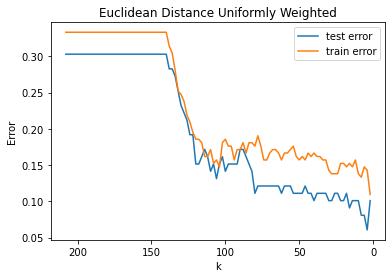

The best k is 4


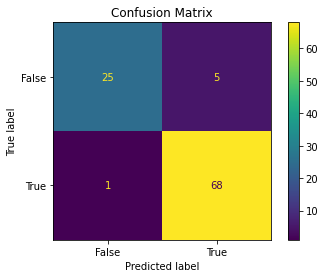

precision =  [0.96153846 0.93150685]
f1 score =  [0.89285714 0.95774648]


In [35]:
#%% Let's try different k and see the distribution of mean  test error
mte = [] # initiate Mean Test error as a empty list
train_error = [] # same for train error
for k in range(2,210,2): # k with increment 2
    neigh = KNeighborsClassifier(n_neighbors = k, metric= 'euclidean',weights='uniform').fit(train_x,train_y) # set euclidean distance
    mte.append(mean_squared_error(test_y,neigh.predict(test_x))) # Get mean squared error
    train_error.append(mean_squared_error(train_y,neigh.predict(train_x)))

plt.plot(range(2,210,2),mte,range(2,210,2),train_error)
plt.gca().invert_xaxis()
plt.xlabel('k')
plt.ylabel('Error')
plt.legend(['test error','train error'])
plt.title('Euclidean Distance Uniformly Weighted')
plt.show()
best_k = list(range(2,210,2))
best_k = best_k[mte.index(min(mte))] # find the best k that gives min error
print(f'The best k is {best_k}')

# feed the best k into the system and compute confusion matrix and such
neigh = KNeighborsClassifier(n_neighbors = best_k, metric= 'euclidean',weights='uniform') # set euclidean distance
#  see best k = 7  neighbors
neigh.fit(train_x,train_y)
confusion_matrix = metrics.confusion_matrix(test_y, neigh.predict(test_x))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()
# get precision and f1 score
precision = metrics.precision_score(np.transpose(test_y),neigh.predict(test_x),average=None)
f1 = metrics.f1_score(np.transpose(test_y),neigh.predict(test_x),average=None) # f1 score
print('precision = ', precision)
print('f1 score = ', f1)


#### iii. Learning Curve

Text(0, 0.5, 'Best k rate given N')

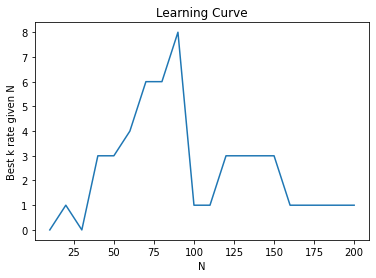

In [11]:
#%% question c(3)
best_k_givenN = []
best_error_rate = []
for N in range(10,210,10):
    train_range = list(range(0,N-N//3)) + list(range(209,209+N//3)) # set the new index range 
    train_x, train_y = attri.iloc[train_range,0:6], attri.iloc[train_range,6]
    test_x, test_y = attri.iloc[test_range,0:6], attri.iloc[test_range,6]
    mte = []
    train_error = []
    for k in range(1,N,5):
        neigh = KNeighborsClassifier(n_neighbors = k, metric= 'euclidean',weights='uniform').fit(train_x,train_y) # set euclidean distance
        mte.append(mean_squared_error(test_y,neigh.predict(test_x))) #
        train_error.append(mean_squared_error(train_y,neigh.predict(train_x)))
        best_k = mte.index(min(mte)) # the k that give least testing error rate given N
    best_k_givenN.append(best_k)
    best_error_rate.append(min(mte))
# Plot the best error rate against N  
plt.plot(range(10,210,10),best_k_givenN)
plt.title('Learning Curve')
plt.xlabel('N')
plt.ylabel('Best k rate given N')

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [12]:
train_range, test_range = list(range(0,140)) + list(range(209,209+70)), list(range(140,209)) + list(range(209+70,309))
train_x, train_y = attri.iloc[train_range,0:6], attri.iloc[train_range,6]
test_x, test_y = attri.iloc[test_range,0:6], attri.iloc[test_range,6]
p_k_error_table = pd.DataFrame() # initialize an empty table to store p, k, and error information


for k in range(1,196,5):
   neigh = KNeighborsClassifier(n_neighbors = k, metric= 'minkowski',weights='uniform',p=1).fit(train_x,train_y) # set minkowski distance
   # set p = 1 so we have manhattan distance
   mte.append(mean_squared_error(test_y,neigh.predict(test_x))) #
   train_error.append(mean_squared_error(train_y,neigh.predict(train_x)))
table = pd.concat([pd.DataFrame(mte,columns=['Test Error']),pd.DataFrame(list(range(1,196,5)),columns=['K'])],axis=1)
best_k = table['K']
best_k = best_k.iloc[mte.index(min(mte))] # get the best k for each p

p_k_error_table = p_k_error_table.append(pd.DataFrame([[1,best_k,np.round(min(mte),2),'Manhattan']]))
print('p_value = ', 1 , 'best_k = ',best_k ,'min_test_error = ',np.round(min(mte),2),' metrics = Manhattan')


p_value =  1 best_k =  6.0 min_test_error =  0.09  metrics = Manhattan


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [39]:
p_list = np.round([10, 7.94328234724282, 6.30957344480193, 5.01187233627272, 3.98107170553497, 3.16227766016838, 2.51188643150958, 1.99526231496888, 1.58489319246111, 1.25892541179417],2)
# the p you get with log10(p) == 0.1 0.2 ...1
train_error = [] # same for train error
train_range, test_range = list(range(0,140)) + list(range(209,209+70)), list(range(140,209)) + list(range(209+70,309))
train_x, train_y = attri.iloc[train_range,0:6], attri.iloc[train_range,6]
test_x, test_y = attri.iloc[test_range,0:6], attri.iloc[test_range,6]
p_k_error_table = pd.DataFrame() # initialize an empty table to store p, k, and error information


for p_value in p_list:
    mte = list()
    for k in range(1,196,5):
        neigh = KNeighborsClassifier(n_neighbors = k, metric= 'minkowski',weights='uniform',p=p_value).fit(train_x,train_y) # set minkowski distance
        # set p = 1 so we have manhattan distance
        mte.append(mean_squared_error(test_y,neigh.predict(test_x))) #
        train_error.append(mean_squared_error(train_y,neigh.predict(train_x)))
    table = pd.concat([pd.DataFrame(mte,columns=['Test Error']),pd.DataFrame(list(range(1,196,5)),columns=['K'])],axis=1)
    best_k = table['K']
    best_k = best_k.iloc[mte.index(min(mte))] # get the best k for each p
    p_k_error_table = p_k_error_table.append(pd.DataFrame([[p_value, best_k ,np.round(min(mte),2),'Minkowski']]))
    print('p_value = ',p_value, 'best_k = ',best_k ,'min_test_error = ',np.round(min(mte),2),' metrics = Minkowski')
p_k_error_table.rename(columns = {0:'p_value',1:'best k',2:'test_error',3:'distance type'}, inplace = True)

p_value =  10.0 best_k =  6 min_test_error =  0.08  metrics = Minkowski
p_value =  7.94 best_k =  6 min_test_error =  0.08  metrics = Minkowski
p_value =  6.31 best_k =  6 min_test_error =  0.07  metrics = Minkowski
p_value =  5.01 best_k =  6 min_test_error =  0.06  metrics = Minkowski
p_value =  3.98 best_k =  6 min_test_error =  0.06  metrics = Minkowski
p_value =  3.16 best_k =  6 min_test_error =  0.07  metrics = Minkowski
p_value =  2.51 best_k =  6 min_test_error =  0.08  metrics = Minkowski
p_value =  2.0 best_k =  6 min_test_error =  0.08  metrics = Minkowski
p_value =  1.58 best_k =  6 min_test_error =  0.09  metrics = Minkowski
p_value =  1.26 best_k =  6 min_test_error =  0.09  metrics = Minkowski


##### C. Chebyshev Distance With p -> infinity.

In [38]:

train_error = [] # same for train error
p_k_error_table = pd.DataFrame() # initialize an empty table to store p, k, and error information

mte = list()
for k in range(1,196,5):
    neigh = KNeighborsClassifier(n_neighbors = k, metric= 'minkowski',weights='uniform',p=np.inf).fit(train_x,train_y) # set minkowski distance
    # set p = 1 so we have manhattan distance
    mte.append(mean_squared_error(test_y,neigh.predict(test_x))) #
    train_error.append(mean_squared_error(train_y,neigh.predict(train_x)))
table = pd.concat([pd.DataFrame(mte,columns=['Test Error']),pd.DataFrame(list(range(1,196,5)),columns=['K'])],axis=1)
best_k = table['K']
best_k = best_k.iloc[mte.index(min(mte))] # get the best k for each p

p_k_error_table = p_k_error_table.append(pd.DataFrame([[p_value, best_k,np.round(min(mte),2),'Chebyshev']]))
print('p_value = ',p_value, 'best_k = ',best_k ,'min_test_error = ',np.round(min(mte),2),' metrics = Chebyshev')

p_k_error_table.rename(columns = {0:'p_value',1:'best k',2:'test_error',3:'distance type'}, inplace = True)

p_value =  inf best_k =  16 min_test_error =  0.08  metrics = Chebyshev


#### ii. Mahalanobis Distance.

In [40]:
# First do dimensionality reduction 
inverse = np.linalg.inv(np.cov(np.transpose(train_x),bias=True)) # inverse of covariance matrix of training data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

train_range, test_range = list(range(0,140)) + list(range(209,209+70)), list(range(140,209)) + list(range(209+70,309))
x = attri.iloc[:,0:6] # feature space
x = StandardScaler().fit(x).transform(x) # standardized x
pca = PCA(n_components=2).fit(x) # dimensionality reduction
x = pca.transform(x)
#print(x, x_pca.shape)
train_x, train_y = x[train_range,:], attri.iloc[train_range,6]
test_x, test_y = x[test_range,:], attri.iloc[test_range,6]
mte = list()

for k in range(1,196,5):
        neigh = KNeighborsClassifier(n_neighbors = k, metric= 'mahalanobis',metric_params={'VI': np.cov(np.transpose(train_x))}).fit(train_x,train_y) # set mahalanobis distance
        # set p = 1 so we have manhattan distance
        mte.append(mean_squared_error(test_y,neigh.predict(test_x))) #
        train_error.append(mean_squared_error(train_y,neigh.predict(train_x)))

table = pd.concat([pd.DataFrame(mte,columns=['Test Error']),pd.DataFrame(list(range(1,196,5)),columns=['K'])],axis=1)
best_k = table['K']
best_k = best_k.iloc[mte.index(min(mte))] # get the best k that give min(mean test error)
print('best_k = ', best_k,'min_error = ', min(mte))

best_k =  56 min_error =  0.1717171717171717


### (e) Weighted Decision

In [41]:
train_error = [] # same for train error
train_range, test_range = list(range(0,140)) + list(range(209,209+70)), list(range(140,209)) + list(range(209+70,309))
train_x, train_y = attri.iloc[train_range,0:6], attri.iloc[train_range,6]
test_x, test_y = attri.iloc[test_range,0:6], attri.iloc[test_range,6]

for distance in ['minkowski','chebyshev','manhattan']: # try three metrics, fixed p = 1
    mte = list() # mean test error
    for k in range(1,196,5):
        neigh = KNeighborsClassifier(n_neighbors = k, metric= distance, weights='distance').fit(train_x,train_y) # change weights to be distance dependent
        mte.append(mean_squared_error(test_y,neigh.predict(test_x))) #
        train_error.append(mean_squared_error(train_y,neigh.predict(train_x)))
    table = pd.concat([pd.DataFrame(mte,columns=['Test Error']),pd.DataFrame(list(range(1,196,5)),columns=['K'])],axis=1)
    best_k = table['K']
    best_k = best_k.iloc[mte.index(min(mte))] # get the best k for each p
    print('best_k = ',best_k,'min_error = ', np.round(min(mte),2),' metrics = ', distance)

best_k =  6 min_error =  0.1  metrics =  minkowski
best_k =  16 min_error =  0.11  metrics =  chebyshev
best_k =  6 min_error =  0.1  metrics =  manhattan


### (f) Training Error Rate

The lowest error rate I can get is p_value =  5.01 best_k =  6 min_test_error =  0.06  metrics = Minkowski